This notebook helped merge the dataset resulted from initial_merging.ipynb with apple_music_matches.csv, resulting from the script collect_apple_previews.py. We also check and compare distributions of our data before and after merging.

In [1]:
import pandas as pd

In [2]:
netID = "jsc9862"

df_merged = pd.read_csv(f"/scratch/{netID}/Explaining_Song_Popularity/merged_df_with_ids.csv")
df_links = pd.read_csv(f"/scratch/{netID}/Explaining_Song_Popularity/apple_music_matches.csv")

In [3]:
final_df = df_merged.merge(
    df_links[["song_id", "preview_url", "query_title", "query_artist", "track_id", "track_view_url"]],
    on="song_id",
    how="left"
)

final_df = final_df[["song_id", "title", "artist", "query_title", "query_artist", "track_genre", "popularity", "lyrics", "preview_url", "track_id", "track_view_url"]]
final_df = final_df.dropna(subset=["preview_url", "lyrics"])
final_df['track_id'] = final_df['track_id'].astype(int)

final_df.head()

,song_id,title,artist,query_title,query_artist,track_genre,popularity,lyrics,preview_url,track_id,track_view_url
0,0,Mr. Brightside,The Killers,mr brightside,the killers,alt-rock,2.0,[Verse]\nComing out of my cage and I've been d...,https://audio-ssl.itunes.apple.com/itunes-asse...,1440891171,https://music.apple.com/us/album/mr-brightside...
1,1,Californication,Red Hot Chili Peppers,californication,red hot chili peppers,alt-rock,2.0,[Verse 1]\nPsychic spies from China try to ste...,https://audio-ssl.itunes.apple.com/itunes-asse...,947688104,https://music.apple.com/us/album/californicati...
2,2,Seven Nation Army,The White Stripes,seven nation army,the white stripes,alt-rock,84.0,[Verse 1]\nI'm gonna fight 'em off\nA seven na...,https://audio-ssl.itunes.apple.com/itunes-asse...,1533513537,https://music.apple.com/us/album/seven-nation-...
3,3,All Star,Smash Mouth,all star,smash mouth,alt-rock,0.0,[Verse 1]\nSomebody once told me the world is ...,https://audio-ssl.itunes.apple.com/itunes-asse...,1440915693,https://music.apple.com/us/album/all-star/1440...
4,4,Where Is My Mind?,Pixies,where is my mind,pixies,alt-rock,77.0,"[Intro: Black Francis, Kim Deal]\nOoh—stop\n\n...",https://audio-ssl.itunes.apple.com/itunes-asse...,1027465608,https://music.apple.com/us/album/where-is-my-m...


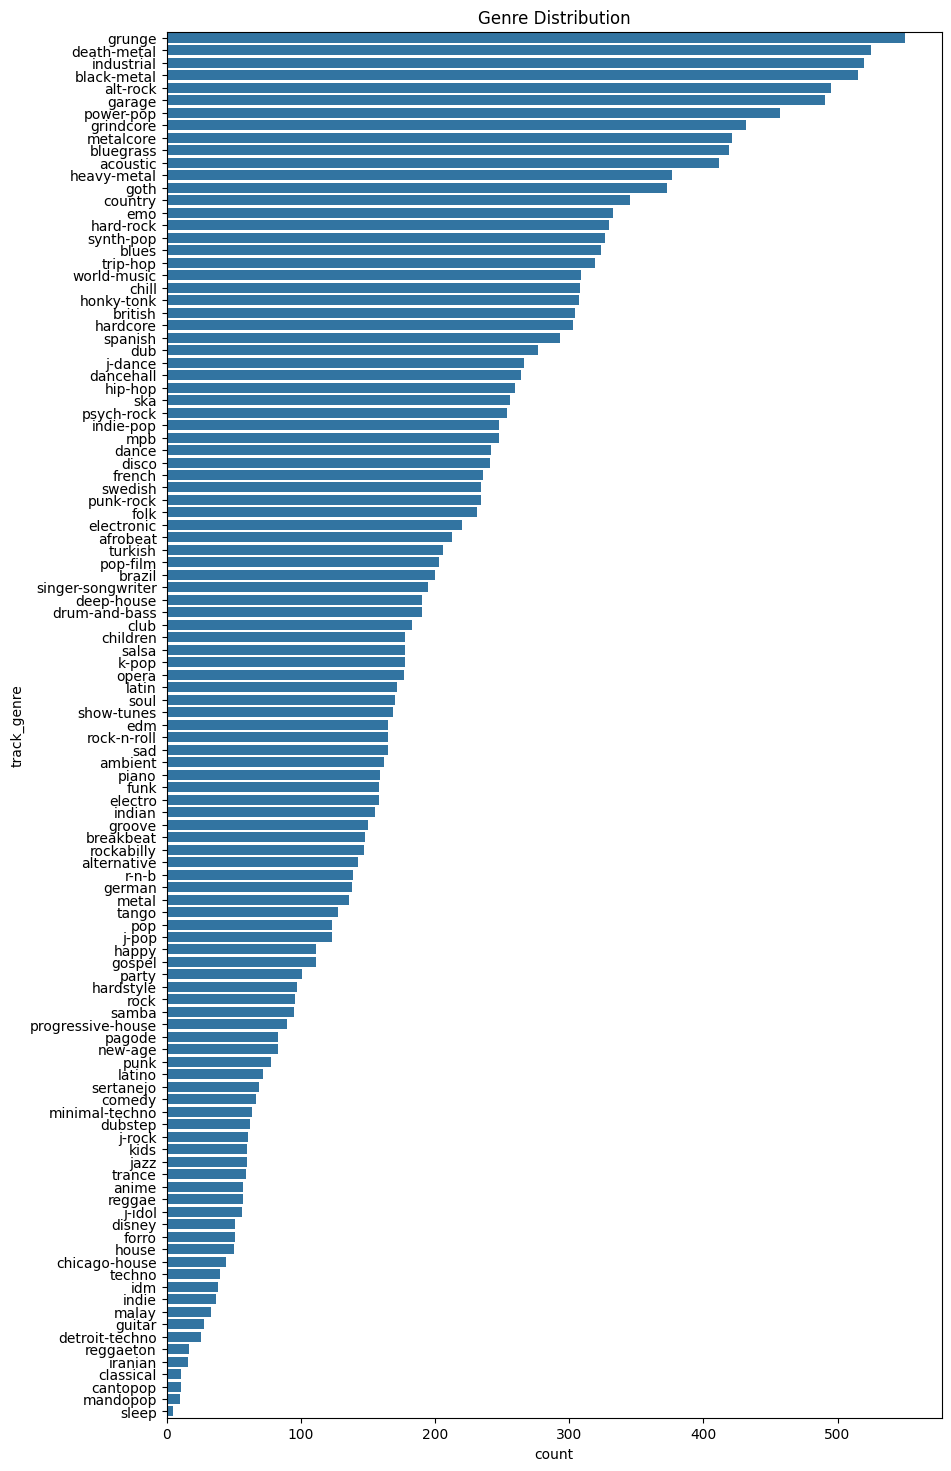

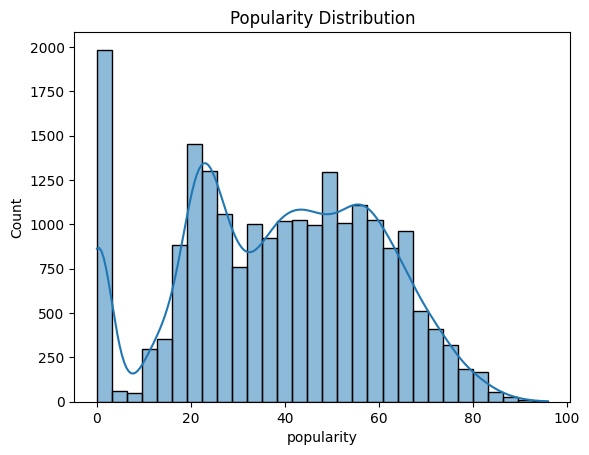

In [10]:
plt.figure(figsize=(10, 18))
sns.countplot(y='track_genre', data=final_df, order=final_df['track_genre'].value_counts().index)
plt.title("Genre Distribution")
plt.savefig("img1.png") 
plt.show()

sns.histplot(final_df['popularity'], bins=30, kde=True)
plt.title("Popularity Distribution")
plt.savefig("img2.png") 
plt.show()

In [19]:
"After downloading .wav files, add paths final_df"

with open(f"/scratch/{netID}/Explaining_Song_Popularity/download_list.txt", "w") as f:
    for _, row in final_df.iterrows():
        tid = int(row["track_id"])
        url = row["preview_url"]
        f.write(f"{tid}|{url}\n")
